In [1]:
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import time

In [2]:
data=pd.read_csv("AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])  #add DateTime to my data to generate dt 

data['day_of_week'] = data['Date'].dt.weekday_name  #add the days standard to the date

In [3]:
data['same_day_delta'] = ((data['Close'] - data['Open']) / data['Open'] ) * 100 #percentage difference between 'open','close'

data['same_day_strategy'] = np.where(data['same_day_delta'] <= 0,'0' ,'1')
data['same_day_strategy']=pd.to_numeric(data['same_day_strategy'], errors='ignore')#convert from object to int
print(data['same_day_strategy'].dtypes)


data['next_close_delta'] = 100 * (1 - data.iloc[0].Close / data.Close)
data['next_close_strategy'] = np.where(data['next_close_delta'] <= 1,'0' ,'1')
data['next_close_strategy']=pd.to_numeric(data['next_close_strategy'], errors='ignore')#convert from object to int
print(data['next_close_strategy'].dtypes)

int64
int64


In [4]:
#information per month
data['year'] = pd.DatetimeIndex(data['Date']).year #extract year from Date

data['month'] = pd.DatetimeIndex(data['Date']).month # extract month from Date
monthly=data.groupby(['month','year']).agg({"Close":['mean','max'],"Open":['mean','min'],"High":['min','max'],"Low":['min','max']})
monthly.to_csv("monthly_analysis.csv")    

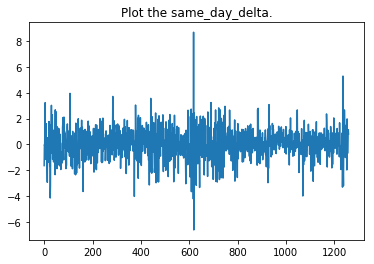

In [5]:
#plot
#data['same_day_delta'].value_counts().plot() 
plt.title('Plot the same_day_delta.')  
plt.plot(data["same_day_delta"])#plot the column
plt.show()

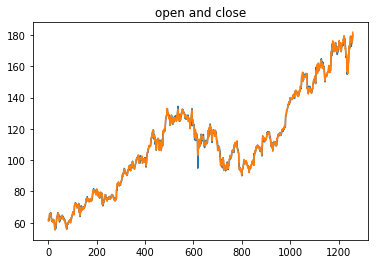

In [6]:
#plot “open”, “close” price in the same plot
plt.title('open and close')
plt.plot(data["Open"])
plt.plot(data["Close"])
plt.show()

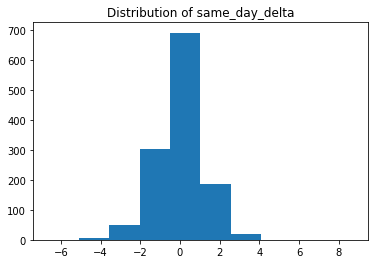

In [7]:
#Plot the distribution of “same_day_delta”.
plt.title('Distribution of same_day_delta')  
plt.hist(data["same_day_delta"]) #Plot the distribution of “same_day_delta”.
plt.show()

In [8]:
import time
start_time = time.time()
print("--- %s data ---" % (time.time() - start_time))

--- 3.695487976074219e-05 data ---
